In [1]:
import os
import pandas as pd

from unify_CV_columns import unify_informes, unify_oral, reformating

### 1r PAS:

Descarregar-se aquest JuPyter Notebook + l'arxiu 'unify_CV_columns.py' i posar-ho en el directori on desitgeu gestionar els documents Excel.

### 2n PAS:

Anar al Campus i descarregar-se un Excel amb totes les notes referents al Informes i la Prova Oral.

NOTA: Campus >> curs >> qualificacions >> informe del qualificador >> Exporta >> **Tipus Excel (no libreoffice)** >> Seleccionar tots els items d'informes i examen oral / deselecionar la resta >> Baixa >> Moure arxiu Excel a la carpeta on toqui >> copiar nom d'arxiu

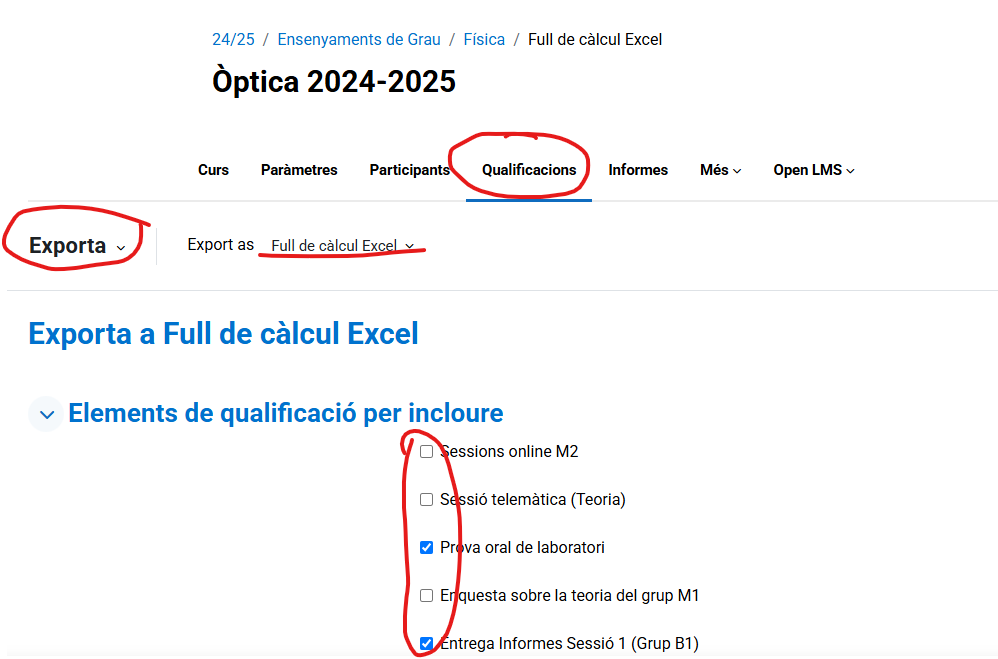

### 3r PAS:

Correr les següents celes de codi


##### Obtenir el nom del fitxer descarregat

In [3]:
fn_not_exists = True
while fn_not_exists:
    excel_filename = input("Nom del fitxer Excel:")  #  "2425O22 Qualificacions.xlsx"  #  <- Posar aquí el nom de l'arxiu
    excel_filename = excel_filename if excel_filename.endswith('.xlsx') else excel_filename+'.xlsx'
    fn_not_exists = not os.path.isfile(excel_filename)
    print(f"\n >>> {excel_filename} does NOT found. Try again," if fn_not_exists 
          else "Found! Continue with next cells...")

Nom del fitxer Excel:2425O22 Qualificacions.xlsx
Found! Continue with next cells...


##### Carrega taula i unifica les columnes fent mitjanes en els informes i obtenint la nota de la prova oral

In [6]:
sheet = 0  # sheet name or sheet number or list of sheet numbers and names

data = pd.read_excel(excel_filename, sheet_name=sheet)

data = unify_informes(data)
data = unify_oral(data)

data = reformating(data)

print("Resulting file:\n")
print(data[:5])
print("  (això és un resum de la taula final)")
print("---------------\n")

print("No values found: (repetidors?)")
repes = data[(data["Informes avg"]==-9) | (data["Prova oral unif."]==-9)]
print('\n'.join([rn+' '+rc for rn, rc in zip(repes['Nom'], repes['Cognoms'])]))
print("---------------\n")

print("Missing grades: (falta alguna nota?)")
repes = data[((data["Informes avg"]>-9) &
              (data["Informes avg"]<0) )    | 
             ((data["Prova oral unif."]>-9) &
              (data["Prova oral unif."]<0))]
print('\n'.join([rn+' '+rc for rn, rc in zip(repes['Nom'], repes['Cognoms'])]))
print("---------------\n")

Resulting file:

      Nom             Cognoms     Número ID Grup Informes avg Prova oral unif.
0    ÈLIA       ARBOIX GARCÍA  niub20628042             0.909              0.4
1    HUGO  BARRIONUEVO NISTAL  niub20571714                -9               -9
2   PAULA       BELLIDO MARÍN  niub20656963             0.817             0.55
3  DANIEL          BLANCO GIL  niub20506511                -9               -9
4   LUCAS        BONMATÍ ROCA  niub20571994             0.909              0.5
  (això és un resum de la taula final)
---------------

No values found: (repetidors?)
HUGO BARRIONUEVO NISTAL
DANIEL BLANCO GIL
DANIEL FERNANDO BRITO VIVAR
JOEL CARRASCO IRIGARAY
ÈLIA CASCALLÓ VERNEREY
MARINA CRISTINO LEBRÓN
SERGI DORADO ANDREU
IGNACIO GARCÍA SÁNCHEZ DE OCAÑA
MARTA GIRAL LÓPEZ
JOAN LLURBA GASCÓ
PABLO MADRIGAL BENAVENT
CARLES MARTÍ POBLET
PAU PAGÈS MATEU
SEBASTIÁN RAMOS SÁNCHEZ
ELIO ROJAS GÓMEZ
---------------

Missing grades: (falta alguna nota?)
CLAUDIA JIMENEZ MONTAÑO
MARIA VILCHES ME

##### Ho exportem a Excel amb el suffix "_unified"

In [13]:
try:
    data.to_excel(excel_filename.replace('.xlsx', "_unified.xlsx"))
except PermissionError:
    print(" >>> No s'ha pogut desar, probablement perquè el document ja existeix "
          "i ESTÀ OBERT.\n     Pot existir, però ha d'estar tancat.")
    

 >>> No s'ha pogut desar, probablement perquè el document ja existeix i ESTÀ OBERT.
     Pot existir, però ha d'estar tancat.
